# Group Notebook

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# import eli5

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

import requests
from bs4 import BeautifulSoup 
import re
from src import prepare, acquire



plt.style.use('classic')

ModuleNotFoundError: No module named 'utils'

# Acquire

In [ ]:
acquire.scrape_github_data()

https://github.com/search?q=candles&type=Repositories

In [10]:
# this was my attempt at getting readme data from github

# url = 'https://github.com/search?q=candles&type=Repositories'
# headers={'user-agent': 'Codeup DS Germain'} 
# response = requests.get(url, headers=headers)

# soup = BeautifulSoup(response.text)


# article = soup.select('div', class_='jupiterx-post-content')

# art_dict = {'title':[], 'content':[]}

# soup.title.string

# Explore

In [8]:
# getting the data 
df = pd.read_csv('data/processed.csv')

In [9]:
df.head() # check_yo_head

,repo,language,readme,words,lang_freq
0,/apple/swift,C++,img src https swift org asset imag swift svg a...,1260,100
1,/openalpr/openalpr,C++,openalpr openalpr open sourc automat licens pl...,622,100
2,/tensorflow/tensorflow,C++,div align center img src https www tensorflow ...,1216,100
3,/wjakob/pybind11,C++,pybind logo https github com pybind pybind raw...,610,100
4,/Polytonic/Chlorine,C++,chlorin http polyton github io chlorin build s...,624,100


In [63]:
df.groupby('language').sum()

,words,lang_freq
language,,
C,77923,8836
C++,88730,10000
Go,98088,11236
Java,51615,10404
JavaScript,124578,9409
Python,107661,10404
Swift,141670,10000


In [25]:
df.language.value_counts()

Go            106
Java          102
Python        102
C++           100
Swift         100
JavaScript     97
C              94
Name: language, dtype: int64

In [30]:
import nltk
import unicodedata

In [37]:
go = clean(' '.join(df[df.language == 'Go'].language))
java = clean(' '.join(df[df.language == 'Java'].language))
python = clean(' '.join(df[df.language == 'Python'].language))
C_plus_plus = clean(' '.join(df[df.language == 'C++'].language))
Swift = clean(' '.join(df[df.language == 'Swift'].language))
javascript = clean(' '.join(df[df.language == 'JavaScript'].language))
c = clean(' '.join(df[df.language == 'C'].language))
all_languages = clean(' '.join(df.language))

In [42]:
go_freq = pd.Series(go).value_counts()
java_freq = pd.Series(java).value_counts()
python_freq = pd.Series(python).value_counts()
c_plus_plus_freq = pd.Series(C_plus_plus).value_counts()
Swift_freq = pd.Series(Swift).value_counts()
javascript_freq = pd.Series(javascript).value_counts()
c_script = pd.Series(c).value_counts()

all_freq = pd.Series(all_languages).value_counts()

java_freq.head()

java    102
dtype: int64

In [43]:
word_counts = (pd.concat([all_freq, go_freq, java_freq, python_freq, c_plus_plus_freq, Swift_freq, javascript_freq, c_script], axis=1, sort=True)
                .set_axis(['all', 'go', 'java', 'python', 'c++', 'swift', 'js', 'c'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,go,java,python,c++,swift,js,c
c,194,0,0,0,100,0,0,94
go,106,106,0,0,0,0,0,0
java,102,0,102,0,0,0,0,0
javascript,97,0,0,0,0,0,97,0
python,102,0,0,102,0,0,0,0


In [44]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,go,java,python,c++,swift,js,c
c,194,0,0,0,100,0,0,94
go,106,106,0,0,0,0,0,0
java,102,0,102,0,0,0,0,0
python,102,0,0,102,0,0,0,0
swift,100,0,0,0,0,100,0,0
javascript,97,0,0,0,0,0,97,0


Text(0.5, 1.0, 'Proportion of Coding Languages')

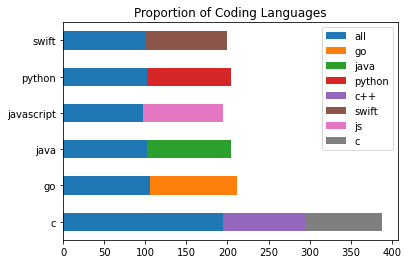

In [49]:
word_counts.plot.barh(stacked=True)
plt.title('Proportion of Coding Languages')

In [50]:
from wordcloud import WordCloud

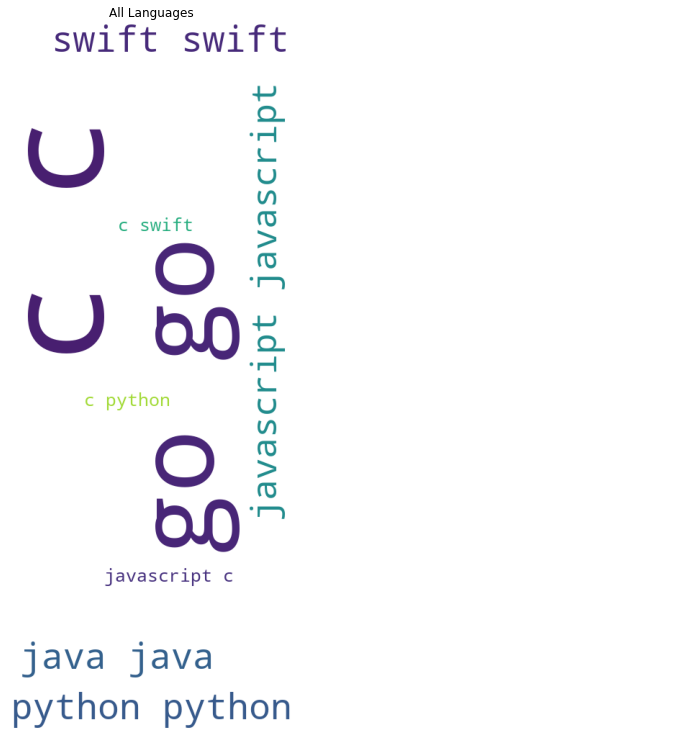

In [60]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_languages))

plt.figure(figsize=(10, 10))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)

axs[0].set_title('All Languages')

for ax in axs: ax.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

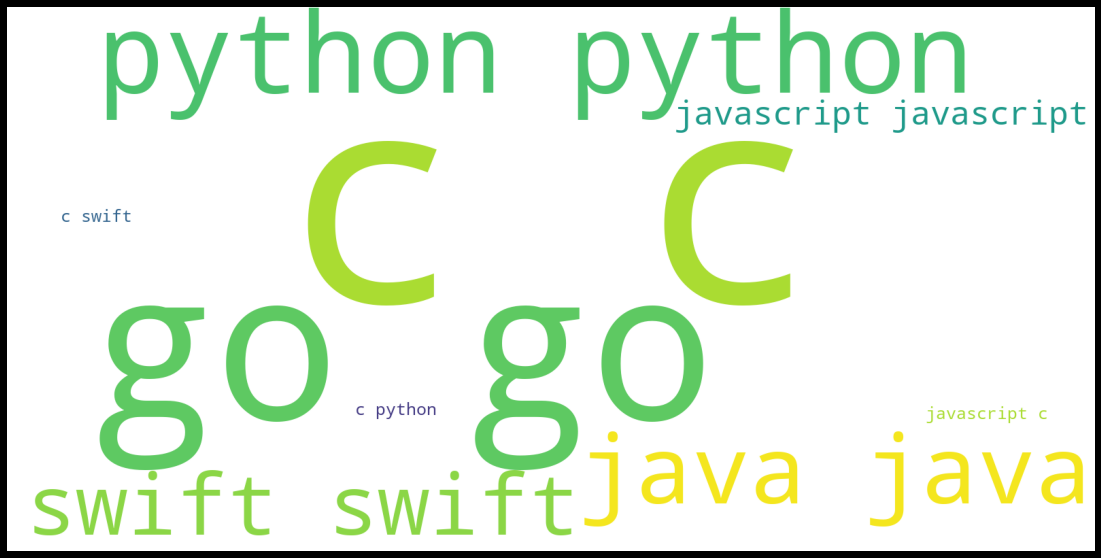

In [61]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(all_languages))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

# Next

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import unicodedata
import re
import json
import pandas as pd 
# # Opening JSON file
# f = open('data.json',)
 
# returns JSON object as
# a dictionary
# data = json.load(f)

In [ ]:
df = pd.read_csv('data/processed.csv')

In [ ]:
#data is cleaned 
df.info()

In [ ]:
df.language.value_counts()

In [ ]:
df.readme.unique().value_counts()

In [ ]:
# import plotly.express as px

# fig = px.histogram(df, x='lang_freq', template='plotly_white', title='readme counts by language')
# fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Number of readme counts')
# fig.show()

read_me_df = df[['readme', 'language']].copy()

In [ ]:
#how many language observations do we have?
read_me_df.language.value_counts(normalize = True)

In [ ]:
read_me_df['language'].value_counts()
# Go            106
# Python        102
# Java          102
# Swift         100
# C++           100
# JavaScript     97
# C              94

In [ ]:
# combine all readmes in single string by language
def clean(language):
    '''Simplified text cleaning function'''
    language = language.lower()
    language = unicodedata.normalize('NFKD', language).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', language)

In [ ]:
go_words = clean(' '.join(read_me_df[read_me_df.language == 'Go'].readme))
python_words = clean(' '.join(read_me_df[read_me_df.language == 'Python'].readme))
java_words = clean(' '.join(read_me_df[read_me_df.language == 'Java'].readme))
cplus_plus_words = clean(' '.join(read_me_df[read_me_df.language == 'C++'].readme))
javascript_words = clean(' '.join(read_me_df[read_me_df.language == 'JavaScript'].readme))
swift_words = clean(' '.join(read_me_df[read_me_df.language == 'Swift'].readme))
c_words = clean(' '.join(read_me_df[read_me_df.language == 'C'].readme))

In [ ]:
all_words = clean(' '.join(read_me_df.readme))

In [ ]:
# Represent text as word frequencies.

go_freq = pd.Series(go_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
cplus_plus_freq = pd.Series(cplus_plus_words.split()).value_counts()
javascript_freq = pd.Series(javascript_words.split()).value_counts()
swift_freq = pd.Series(swift_words.split()).value_counts()
c_freq = pd.Series(c_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [ ]:
pd.concat([go_freq, python_freq, java_freq, cplus_plus_freq, javascript_freq, swift_freq, c_freq, all_freq], axis = 1).fillna(0).astype(int)

In [ ]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([go_freq, python_freq, java_freq, cplus_plus_freq, javascript_freq, swift_freq, c_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['Go', 'Python', 'Java', 'C++', 'JavaScript', 'Swift', 'C', 'all']
word_counts.head()

In [ ]:
# sort by 'all'

word_counts.sort_values('all', ascending=False).head(20)

In [ ]:
# word_counts.sort_values(['Go', 'Python', 'Java', 'C++', 'JavaScript', 'Swift', 'C'], ascending=[True, False]).head(20)


plt.rc('font', size=18)
word_counts.sort_values('all', ascending=False).head(20)[['Go', 'Python', 'Java', 'C++', 'JavaScript', 'Swift', 'C']].plot.barh()
plt.title('Count by Language for the top 20 most frequent words')




plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'Go')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of Go vs all for the most common 20 words')

In [ ]:
# =============================================================================
# Looking at Bigrams
# =============================================================================

In [ ]:
# =============================================================================
# #Go Bigrams
# =============================================================================
list(nltk.bigrams(go_words.split()))

# what are the most common bigrams? by language bigrams? 
# visualize 20 most common bigrams, most common by language bigrams
# ngrams

# Find the most common bigram and then find a representative text

pd.Series(nltk.bigrams(go_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Go bigrams')

In [ ]:
# =============================================================================
# Python Birgrams
# =============================================================================
pd.Series(nltk.bigrams(python_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Python bigrams')

In [ ]:
# =============================================================================
# Java Bigrams
# =============================================================================
pd.Series(nltk.bigrams(java_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Java bigrams')

In [ ]:
# =============================================================================
# C++ Bigrams
# =============================================================================
pd.Series(nltk.bigrams(cplus_plus_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common C++ bigrams')

In [ ]:
# =============================================================================
# Javascript Bigrams
# =============================================================================
pd.Series(nltk.bigrams(javascript_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Javascript bigrams')

In [ ]:
# =============================================================================
# Swift Bigrams
# =============================================================================
pd.Series(nltk.bigrams(swift_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Swift bigrams')

In [ ]:
# =============================================================================
# C Bigrams
# =============================================================================
pd.Series(nltk.bigrams(c_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common C bigrams')

In [8]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import eli5

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


plt.style.use('classic')

In [4]:
df = pd.read_csv('data/processed.csv')

In [7]:
df.head()

,repo,language,readme,words,lang_freq
0,/apple/swift,C++,img src https swift org asset imag swift svg a...,1260,100
1,/openalpr/openalpr,C++,openalpr openalpr open sourc automat licens pl...,622,100
2,/tensorflow/tensorflow,C++,div align center img src https www tensorflow ...,1216,100
3,/wjakob/pybind11,C++,pybind logo https github com pybind pybind raw...,610,100
4,/Polytonic/Chlorine,C++,chlorin http polyton github io chlorin build s...,624,100


# Bag of Words

In [10]:
cv = CountVectorizer()
bag_of_words = cv.fit_transform(df.readme)

In [11]:
bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [12]:
cv.get_feature_names()

['aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaa',
 'aaaaaaaacn',
 'aaaaaavvvvvxxxxxtttt',
 'aaaab',
 'aaaabbbbcccc',
 'aaaacc',
 'aaaaoooooo',
 'aaabf',
 'aaad',
 'aaaffaaaa',
 'aab',
 'aabc',
 'aabqxjyv',
 'aac',
 'aacaf',
 'aacanakin',
 'aacb',
 'aaccess',
 'aacigyxew',
 'aad',
 'aadadd',
 'aadc',
 'aadvic',
 'aae',
 'aaf',
 'aafb',
 'aaff',
 'aagtorr',
 'aagxjzrqm',
 'aah',
 'aalen',
 'aan',
 'aandroid',
 'aanze',
 'aap',
 'aapcmdackhlfobmkcpplkjpfceihngkh',
 'aapl',
 'aaplhn',
 'aaqobk',
 'aar',
 'aarch',
 'aaron',
 'aarono',
 'aaronpearc',
 'aaronrandal',
 'aaronsw',
 'aaronvb',
 'aarsaeth',
 'aas',
 'ab',
 'aba',
 'ababc',
 'abacus',
 'abandon',
 'abb',
 'abbaswasim',
 'abbba',
 'abbc',
 'abber',
 'abbr',
 'abbrev',
 'abbrevi',
 'abc',
 'abd',
 'abdol',
 'abe',
 'abeginn',
 'abeiv',
 'abel',
 'abelhadigit',
 'aberr',
 'abf',
 'abfa',
 'abfc',
 'abffb',
 'abhigupta',
 'abhik',
 'abhinav',
 'abi',
 'abid',
 'abil',
 'abilita',
 'abl',
 'ablad',
 'a

In [15]:
cv.vocabulary_

{'img': 12394,
 'src': 25508,
 'https': 11951,
 'swift': 26274,
 'org': 19426,
 'asset': 1565,
 'imag': 12334,
 'svg': 26237,
 'alt': 820,
 'logo': 15546,
 'height': 11476,
 'program': 21210,
 'languag': 14565,
 'architectur': 1366,
 'main': 15921,
 'packag': 19681,
 'maco': 15855,
 'build': 3193,
 'status': 25698,
 'ci': 4143,
 'job': 13579,
 'oss': 19494,
 'increment': 12504,
 'ra': 21904,
 'lastcompletedbuild': 14599,
 'badg': 1979,
 'icon': 12156,
 'ubuntu': 28080,
 'linux': 15289,
 'cento': 3798,
 'amazon': 858,
 'communiti': 4738,
 'host': 11811,
 'platform': 20600,
 'os': 19455,
 'github': 10451,
 'com': 4681,
 'appl': 1249,
 'continu': 4978,
 'integr': 12763,
 'blob': 2722,
 'node': 18333,
 'ppc': 20903,
 'le': 14727,
 'json': 13745,
 'extern': 8466,
 'aarch': 45,
 'docker': 6936,
 'android': 969,
 'lts': 15716,
 'armv': 1433,
 'arm': 1424,
 'window': 29819,
 'vs': 29319,
 'welcom': 29658,
 'high': 11618,
 'perform': 20165,
 'system': 26463,
 'clean': 4278,
 'modern': 17025,
 '

In [16]:
tfid = TfidfVectorizer()
bag_of_words = tfid.fit_transform(df.readme)

In [18]:
bag_of_words.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
tfid.get_feature_names()

['aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaa',
 'aaaaaaaacn',
 'aaaaaavvvvvxxxxxtttt',
 'aaaab',
 'aaaabbbbcccc',
 'aaaacc',
 'aaaaoooooo',
 'aaabf',
 'aaad',
 'aaaffaaaa',
 'aab',
 'aabc',
 'aabqxjyv',
 'aac',
 'aacaf',
 'aacanakin',
 'aacb',
 'aaccess',
 'aacigyxew',
 'aad',
 'aadadd',
 'aadc',
 'aadvic',
 'aae',
 'aaf',
 'aafb',
 'aaff',
 'aagtorr',
 'aagxjzrqm',
 'aah',
 'aalen',
 'aan',
 'aandroid',
 'aanze',
 'aap',
 'aapcmdackhlfobmkcpplkjpfceihngkh',
 'aapl',
 'aaplhn',
 'aaqobk',
 'aar',
 'aarch',
 'aaron',
 'aarono',
 'aaronpearc',
 'aaronrandal',
 'aaronsw',
 'aaronvb',
 'aarsaeth',
 'aas',
 'ab',
 'aba',
 'ababc',
 'abacus',
 'abandon',
 'abb',
 'abbaswasim',
 'abbba',
 'abbc',
 'abber',
 'abbr',
 'abbrev',
 'abbrevi',
 'abc',
 'abd',
 'abdol',
 'abe',
 'abeginn',
 'abeiv',
 'abel',
 'abelhadigit',
 'aberr',
 'abf',
 'abfa',
 'abfc',
 'abffb',
 'abhigupta',
 'abhik',
 'abhinav',
 'abi',
 'abid',
 'abil',
 'abilita',
 'abl',
 'ablad',
 'a

In [22]:
#idf score
pd.Series(dict(zip(tfid.get_feature_names(), tfid.idf_))).sort_values()

https                                    1.037740
com                                      1.045164
github                                   1.097164
use                                      1.130686
http                                     1.260514
                                           ...   
icedotaku                                6.860786
icecreamtruckday                         6.860786
icecreamday                              6.860786
ichart                                   6.860786
zzzzzzzzzzzzzzzzzzzzzzzzzbbbbddddllll    6.860786
Length: 31025, dtype: float64

# Bag of Ngrams

In [23]:
tfid = TfidfVectorizer(ngram_range=(2, 2))
bag_of_words = tfid.fit_transform(df.readme)

In [24]:
#idf score
pd.Series(dict(zip(tfid.get_feature_names(), tfid.idf_))).sort_values()

github com                                                                     1.133938
https github                                                                   1.160343
shield io                                                                      1.877180
img shield                                                                     1.877180
https www                                                                      1.887507
                                                                                 ...   
get bigger                                                                     6.860786
get benefit                                                                    6.860786
get begin                                                                      6.860786
get blank                                                                      6.860786
zzzzzzzzzzzzzzzzzzzzzzzzzbbbbddddllll zzzzzzzzzzzzzzzzzzzzzzzzzbbbbddddllll    6.860786
Length: 309187, dtype: float64

# Modeling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [26]:
df.head()

,repo,language,readme,words,lang_freq
0,/apple/swift,C++,img src https swift org asset imag swift svg a...,1260,100
1,/openalpr/openalpr,C++,openalpr openalpr open sourc automat licens pl...,622,100
2,/tensorflow/tensorflow,C++,div align center img src https www tensorflow ...,1216,100
3,/wjakob/pybind11,C++,pybind logo https github com pybind pybind raw...,610,100
4,/Polytonic/Chlorine,C++,chlorin http polyton github io chlorin build s...,624,100


In [27]:
X = df.readme
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

In [30]:
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_bow, y_train)

tree.score(X_bow, y_train)

0.6892857142857143

In [31]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X_train)
tree.fit(X_tfidf, y_train)
tree.score(X_tfidf, y_train)

0.7267857142857143

In [32]:
# Whatever transformations we apply to X_train need to be applied to X_test
tree.score(tfidf.transform(X_test), y_test)

0.5319148936170213

<AxesSubplot:>

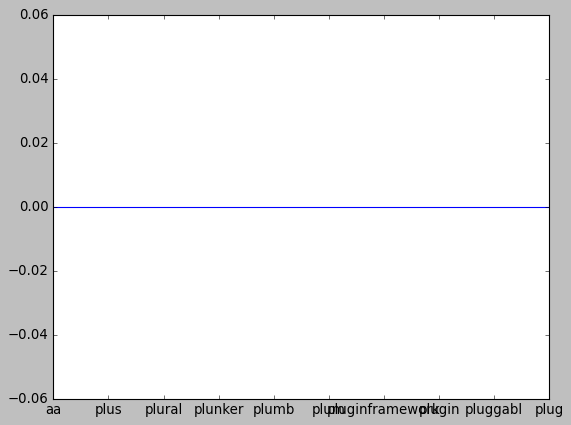

In [38]:
pd.Series(dict(zip(cv.get_feature_names(), tree.feature_importances_))).sort_values().head(10).plot()

<AxesSubplot:>

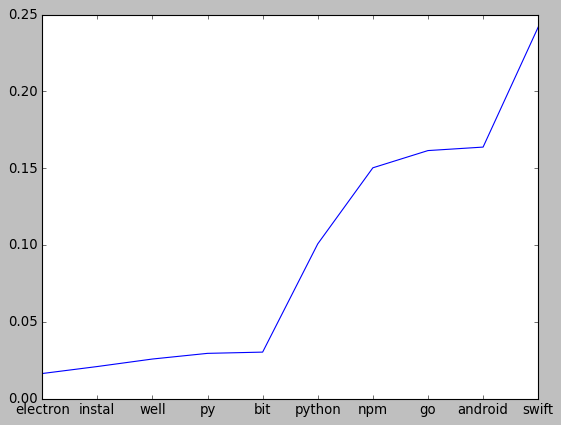

In [39]:
pd.Series(dict(zip(cv.get_feature_names(), tree.feature_importances_))).sort_values().tail(10).plot()

In [18]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import eli5

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

plt.style.use('classic')
plt.rcParams['figure.figsize'] = (8,8)
cmap_train, cmap_test = "bone", "plasma"

## Classification

In [9]:
df = pd.read_csv('data/processed.csv')
X_train, X_test, y_train, y_test = train_test_split(df.readme, df.language,
                    test_size=.22, random_state=0, stratify=df.language)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   repo       701 non-null    object
 1   language   701 non-null    object
 2   readme     701 non-null    object
 3   words      701 non-null    int64 
 4   lang_freq  701 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 27.5+ KB
None


In [10]:
df.language.value_counts()

Go            106
Python        102
Java          102
C++           100
Swift         100
JavaScript     97
C              94
Name: language, dtype: int64

### Dummy (baseline)

              precision    recall  f1-score   support

           C       0.11      0.12      0.12        73
         C++       0.13      0.12      0.12        78
          Go       0.21      0.22      0.22        83
        Java       0.14      0.13      0.13        79
  JavaScript       0.19      0.17      0.18        76
      Python       0.11      0.13      0.12        79
       Swift       0.18      0.19      0.19        78

    accuracy                           0.15       546
   macro avg       0.15      0.15      0.15       546
weighted avg       0.16      0.15      0.15       546



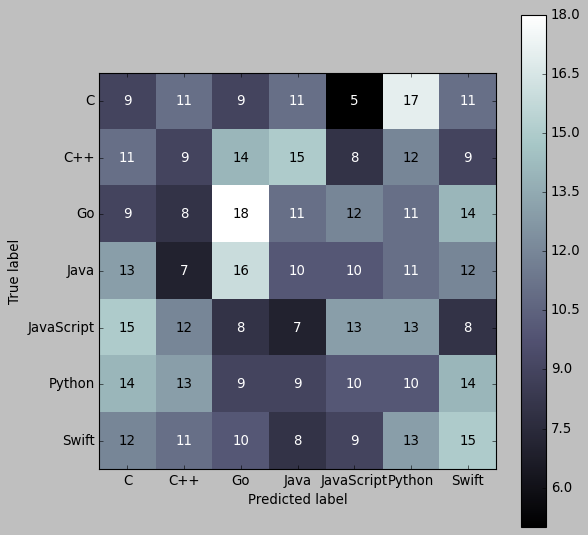

In [61]:
clf = DummyClassifier(strategy='stratified', random_state=2)
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))
plot_confusion_matrix(clf, X_train, y_train, values_format='.0f', cmap=cmap_train)   

In [91]:
def report_and_conf_matrix(clf, X, y, cmap=cmap_train):
    scores = cross_val_score(estimator=clf, X=X, y=y)
    print("-------MAXIMIZE THIS-------\nCross-validation mean accuracy: %0.3f (stdev %0.3f)\n---------------------------" % (scores.mean(), scores.std()))
    print(np.round(scores,3))
    print(classification_report(y, clf.predict(X)))
    plot_confusion_matrix(clf, X, y, values_format='.0f', cmap=cmap)

### Naive Bayes

-------MAXIMIZE THIS-------
Cross-validation mean accuracy: 0.535 (stdev 0.020)
---------------------------
[0.509 0.541 0.523 0.532 0.569]
              precision    recall  f1-score   support

           C       0.92      0.99      0.95        73
         C++       1.00      0.92      0.96        78
          Go       0.99      1.00      0.99        83
        Java       0.98      1.00      0.99        79
  JavaScript       0.97      0.97      0.97        76
      Python       1.00      0.99      0.99        79
       Swift       1.00      0.99      0.99        78

    accuracy                           0.98       546
   macro avg       0.98      0.98      0.98       546
weighted avg       0.98      0.98      0.98       546



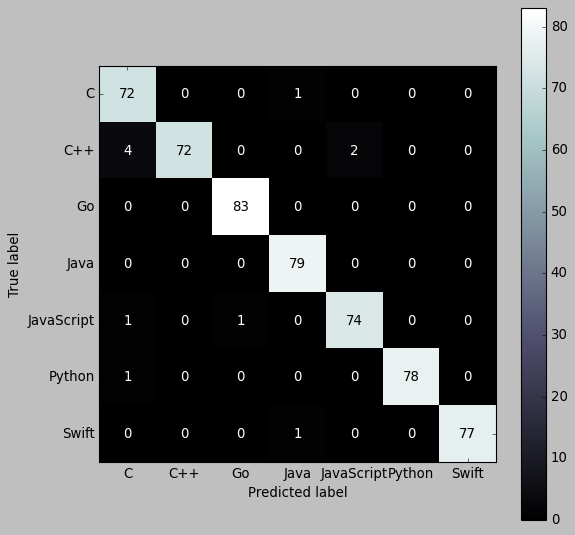

In [92]:
nb_clf = GaussianNB()
nb_vec = TfidfVectorizer(max_features=800)
X = nb_vec.fit_transform(X_train)
nb_clf.fit(X.todense(), y_train)

report_and_conf_matrix(nb_clf, X=X.todense(), y=y_train)

### Logistic regression

-------MAXIMIZE THIS-------
Cross-validation mean accuracy: 0.723 (stdev 0.038)
---------------------------
[0.782 0.706 0.688 0.752 0.688]
              precision    recall  f1-score   support

           C       0.99      0.99      0.99        73
         C++       0.96      0.97      0.97        78
          Go       1.00      0.99      0.99        83
        Java       0.97      0.99      0.98        79
  JavaScript       0.99      0.97      0.98        76
      Python       0.99      0.99      0.99        79
       Swift       1.00      1.00      1.00        78

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546



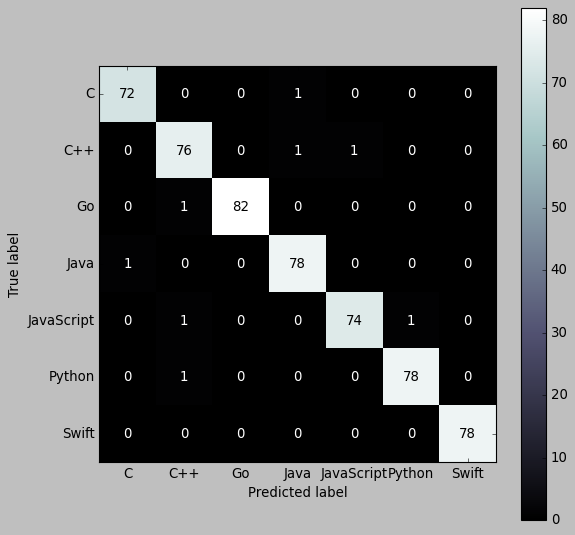

In [93]:
lr_clf = LogisticRegression(C=3)
lr_vec = TfidfVectorizer(max_features=900)
X = lr_vec.fit_transform(X_train)
lr_clf.fit(X, y_train)

report_and_conf_matrix(lr_clf, X=X, y=y_train)

### kNN

-------MAXIMIZE THIS-------
Cross-validation mean accuracy: 0.623 (stdev 0.023)
---------------------------
[0.618 0.606 0.633 0.661 0.596]
              precision    recall  f1-score   support

           C       0.67      0.45      0.54        73
         C++       0.52      0.56      0.54        78
          Go       0.67      0.83      0.74        83
        Java       0.77      0.91      0.83        79
  JavaScript       0.78      0.66      0.71        76
      Python       0.72      0.73      0.73        79
       Swift       0.93      0.85      0.89        78

    accuracy                           0.72       546
   macro avg       0.72      0.71      0.71       546
weighted avg       0.72      0.72      0.71       546



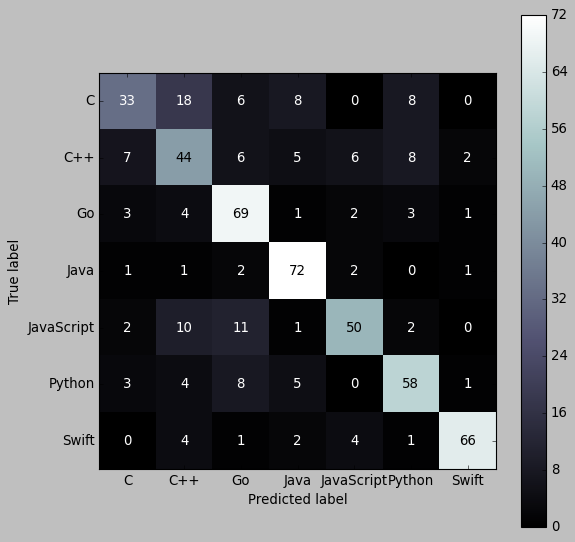

In [94]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_vec = TfidfVectorizer(max_features=1200)
X = knn_vec.fit_transform(X_train)
knn_clf.fit(X, y_train)

report_and_conf_matrix(knn_clf, X=X, y=y_train)

### Random forest

-------MAXIMIZE THIS-------
Cross-validation mean accuracy: 0.775 (stdev 0.029)
---------------------------
[0.782 0.78  0.771 0.817 0.725]
              precision    recall  f1-score   support

           C       0.99      1.00      0.99        73
         C++       1.00      1.00      1.00        78
          Go       1.00      1.00      1.00        83
        Java       1.00      1.00      1.00        79
  JavaScript       1.00      1.00      1.00        76
      Python       1.00      0.99      0.99        79
       Swift       1.00      1.00      1.00        78

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546



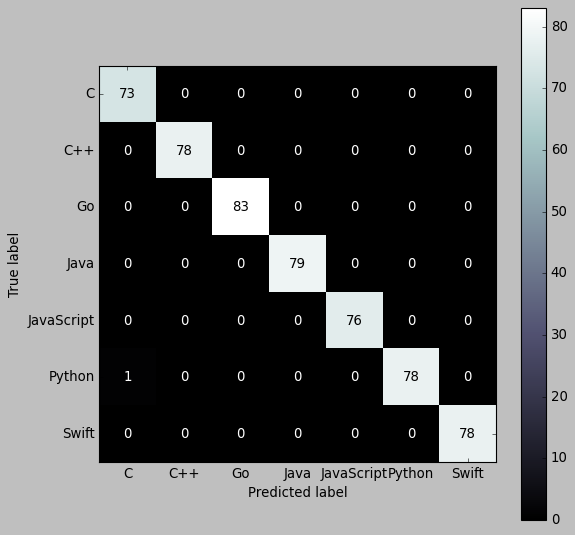

In [95]:
rf_clf = RandomForestClassifier(n_estimators=125,
                                max_depth=20,
                                random_state=36)
rf_vec = TfidfVectorizer(min_df=15, max_df=.35)
X = rf_vec.fit_transform(X_train)
rf_clf.fit(X, y_train)

report_and_conf_matrix(rf_clf, X=X, y=y_train)

In [85]:
eli5.explain_weights(rf_clf, feature_names=list(rf_vec.vocabulary_.keys()))

Weight,Feature
0.0253 ± 0.0681,core
0.0203 ± 0.0703,rout
0.0201 ± 0.0635,account
0.0164 ± 0.0614,boolean
0.0162 ± 0.0708,social
0.0158 ± 0.0522,proper
0.0148 ± 0.0484,round
0.0133 ± 0.0550,line
0.0132 ± 0.0472,mark
0.0125 ± 0.0467,dictionari


### Test set

-------MAXIMIZE THIS-------
Cross-validation mean accuracy: 0.677 (stdev 0.068)
---------------------------
[0.71  0.71  0.742 0.677 0.548]
              precision    recall  f1-score   support

           C       0.57      0.57      0.57        21
         C++       0.67      0.45      0.54        22
          Go       0.91      0.87      0.89        23
        Java       0.71      0.87      0.78        23
  JavaScript       0.86      0.86      0.86        21
      Python       0.62      0.70      0.65        23
       Swift       0.95      0.95      0.95        22

    accuracy                           0.75       155
   macro avg       0.76      0.75      0.75       155
weighted avg       0.76      0.75      0.75       155



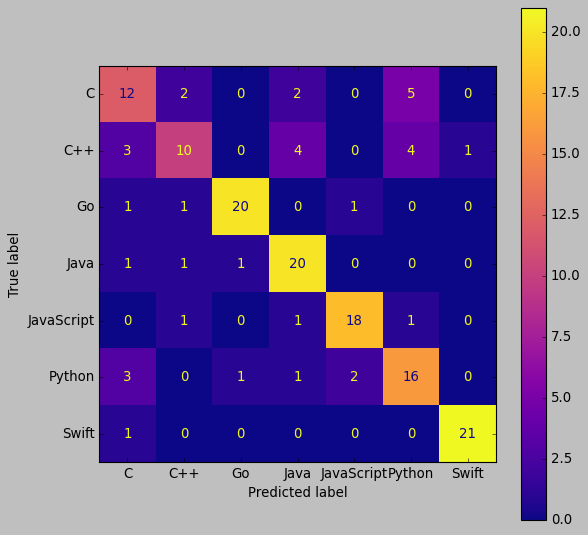

In [98]:
X = TfidfVectorizer(vocabulary=rf_vec.vocabulary_).fit_transform(X_test)
report_and_conf_matrix(rf_clf, X=X, y=y_test, cmap=cmap_test)

-------MAXIMIZE THIS-------
Cross-validation mean accuracy: 0.129 (stdev 0.054)
---------------------------
[0.129 0.161 0.129 0.032 0.194]
              precision    recall  f1-score   support

           C       0.17      0.19      0.18        21
         C++       0.08      0.09      0.09        22
          Go       0.23      0.13      0.17        23
        Java       0.00      0.00      0.00        23
  JavaScript       0.20      0.24      0.22        21
      Python       0.07      0.09      0.08        23
       Swift       0.14      0.14      0.14        22

    accuracy                           0.12       155
   macro avg       0.13      0.12      0.12       155
weighted avg       0.13      0.12      0.12       155



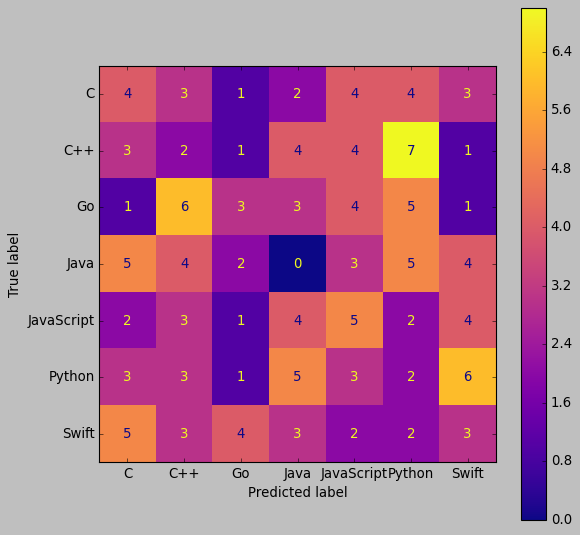

In [99]:
#dummy classifier
report_and_conf_matrix(clf, X=X, y=y_test, cmap=cmap_test)